<img src="./sharif.png" alt="SUT logo" width=300 height=300 align=left class="saturate">

<br>
<font>
<div dir=ltr align=center>
<font color=0F5298 size=7>
    Machine Learning <br>
<font color=2565AE size=5>
    Computer Engineering Department <br>
    Spring 2024<br>
<font color=3C99D size=5>
    Practical Assignment 3<br>
<font color=696880 size=4>
    Ashkan Majidi - Shayan Salehi - Amirhossein Alamdar

____

# Personal Data

In [1]:
student_number = '402211767'
first_name = 'Shayan'
last_name = 'Aryania'

# Introduction

In this assignment, you will implement SVM (Support Vector Machines) for classification.


# Data Preprocessing

Import your needed libraries in following cell.

In [1]:
# TODO: Write your code here
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, balanced_accuracy_score

Load data from ```satimage``` dataset and split data to features and labels. The ```label``` column is our target variable. 

In [26]:
# TODO: Write your code here

data = pd.read_csv("./data/satimage.csv")

X = data.iloc[:,: -1]
y = data.iloc[:,-1]

In [27]:
print("Features:")
print(X.head())

Features:
      0         1         2         3         4         5          6       7  \
0   7.5  6.272730  4.047619  3.975208  3.032258  4.545455   8.421050  1.8125   
1   7.5  4.090909 -0.714290  1.776858  2.903226  3.090909   5.052630 -1.7500   
2  12.0  9.909090  8.333330  5.479339  3.354839  7.272730  10.526316  2.7500   
3   7.5  4.818182  1.190480  2.702482  2.774194  2.363640   5.894740 -0.2500   
4   7.5  4.818182  2.142860  2.702482  3.032258  3.090909   6.736840 -1.0000   

        8         9  ...        26        27        28        29        30  \
0 -2.2500  0.077672  ... -0.517241 -0.600000 -0.138462 -0.188119 -0.431579   
1 -2.2500  0.077672  ... -0.517241 -0.600000 -0.015385 -0.049505 -0.431579   
2  3.4375  6.368924  ...  0.103448 -0.233333  0.200000  0.207921 -0.010526   
3 -3.8750 -2.368924  ... -0.011494 -0.383333 -0.138462 -0.049505 -0.347368   
4 -0.6250 -1.320388  ...  0.287356 -0.183333  0.230769  0.267327 -0.031579   

         31       32        33        34

In [28]:
print("\nLabels:")
print(y.head())


Labels:
0    6.0
1    6.0
2    6.0
3    6.0
4    6.0
Name: label, dtype: float64


Now split data to train, validation and test parts. 60% of data should be used for train, 15% for validation and 25% for test. After that scale the data to Standard Normal Distribution using ```StandardScaler``` class from ```scikit-learn``` library.

In [33]:
# TODO: Write your code here
X_train, X_temp, y_train, y_temp = train_test_split(X,y, test_size=0.4, random_state=42 )

In [34]:
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size =0.625, random_state=42 )

In [35]:
scaler=StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

We want to train Binary SVM model for classification between labels 4 and 6. Choose corresponding datas and convert their lables to 1 and -1 respectively for 4 and 6.

In [47]:
# TODO: Write your code here
mask = (y_train == 4) | (y_train == 6)
X_train_binary = X_train_scaled[mask]
y_train_binary = y_train[mask]

y_train_binary = np.where(y_train_binary == 6, 1, -1)
y_train_binary = np.where(y_train_binary == 4, -1, y_train_binary)

svm_model = SVC(kernel='linear')
svm_model.fit(X_train_binary, y_train_binary)

accuracy = svm_model.score(X_train_binary, y_train_binary)
print("Model accuracy:", accuracy)

Model accuracy: 0.8238546603475514


In [48]:
mask_val = (y_val == 4) | (y_val == 6)
X_val_binary = X_val_scaled[mask_val]
y_val_binary = y_val[mask_val]

y_val_binary = np.where(y_val_binary == 6, 1, -1)
y_val_binary = np.where(y_val_binary == 4, -1, y_val_binary)

mask_test = (y_test == 4) | (y_test == 6)
X_test_binary = X_test_scaled[mask_test]
y_test_binary = y_test[mask_test]

y_test_binary = np.where(y_test_binary == 6, 1, -1)
y_test_binary = np.where(y_test_binary == 4, -1, y_test_binary)


# Model (50 points)

Here is soft margin svm convex optimization formulation. 
$$
\begin{aligned}
\text { Minimize } & \frac{1}{2}\|\mathbf{w}\|^2+C \sum_{i=1}^N \xi_i \\
\text { Subject to } & y_i\left(\mathbf{w}^T \mathbf{x}_i+b\right) \geq 1-\xi_i, \quad i=1,2, \ldots, N \\
& \xi_i \geq 0, \quad i=1,2, \ldots, N
\end{aligned}
$$
write dual of the soft margin svm optimization problem below:

`TODO: Write Here`

Now you should write this optimization problem in standard Quadratic Program (QP) form and use a QP solver to find optimal answer. Here is General form of a QP:
$$
\begin{aligned}
\text { Minimize } & \frac{1}{2} x^TPx + q^Tx + r \\
\text { Subject to } & Gx \leq h \\
& Ax = b
\end{aligned}
$$

Complete functions below and use ```cvxopt``` library which is a common library for solving QPs. Note that you can't use ```scikit-learn``` library.


In [21]:
pip install cvxopt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 4.7 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [17]:
from cvxopt import matrix, solvers

In [49]:
def soft_margin_svm(X, y, C):
    """
    input:
        X: training data
        y: training labels
        C: errors weight
    output:
        support_vectros: data points which are SVs of our model.
        support_vector_labels: labels of SVs
        support_vector_alphas: alpha coefficient of corresponding SVs 
    """

    # TODO: Write your code here
    n_samples, n_features = X.shape

    K = np.dot(X, X.T)
    P = matrix(np.outer(y, y) * K)
    q = matrix(-np.ones(n_samples))
    A = matrix(y, (1, n_samples), 'd')
    b = matrix(0.0)

    G = matrix(np.vstack((-np.eye(n_samples), np.eye(n_samples))))
    h = matrix(np.hstack((np.zeros(n_samples), np.ones(n_samples) * C)))

    sol = solvers.qp(P, q, G, h, A, b)
    alphas = np.array(sol['x'])

    sv_indices = np.where(alphas > 1e-5)[0]
    alphas = alphas[sv_indices]
    support_vectors = X[sv_indices]
    support_vector_labels = y[sv_indices]

    return support_vectors, support_vector_labels, alphas

In [50]:
C = 1.0
support_vectors, support_vector_labels, support_vector_alphas = soft_margin_svm(X_train_binary, y_train_binary, C)

     pcost       dcost       gap    pres   dres
 0: -6.1265e+02 -3.3971e+03  2e+04  3e+00  2e-13
 1: -4.1824e+02 -2.2816e+03  3e+03  3e-01  1e-13
 2: -3.9732e+02 -7.6474e+02  4e+02  3e-02  9e-14
 3: -4.4111e+02 -5.8227e+02  2e+02  9e-03  9e-14
 4: -4.6125e+02 -5.3708e+02  8e+01  4e-03  9e-14
 5: -4.7293e+02 -5.1305e+02  4e+01  2e-03  9e-14
 6: -4.7763e+02 -5.0407e+02  3e+01  1e-03  9e-14
 7: -4.8272e+02 -4.9477e+02  1e+01  4e-04  1e-13
 8: -4.8534e+02 -4.9054e+02  5e+00  2e-04  1e-13
 9: -4.8671e+02 -4.8840e+02  2e+00  4e-05  1e-13
10: -4.8718e+02 -4.8773e+02  6e-01  7e-06  1e-13
11: -4.8738e+02 -4.8747e+02  9e-02  4e-07  1e-13
12: -4.8742e+02 -4.8743e+02  7e-03  3e-08  1e-13
13: -4.8742e+02 -4.8742e+02  2e-04  6e-10  1e-13
Optimal solution found.


In [51]:
def predict_labels(x_test, support_vectors, support_vector_labels, support_vector_alphas):
    """
    input:
        x_test: test data
        support_vectros: data points which are SVs of our model.
        support_vector_labels: labels of SVs
        support_vector_alphas: alpha coefficient of corresponding SVs 
    output:
        y_pred: predictoin labels
    """
    
    # TODO: Write your code here
    decision_function = np.zeros(len(x_test))
    for i in range(len(x_test)):
        for alpha, sv_label, sv in zip(support_vector_alphas, support_vector_labels, support_vectors):
            decision_function[i] += alpha * sv_label * np.dot(sv, x_test[i])
    y_pred = np.sign(decision_function)
    return y_pred

In [52]:
y_pred = predict_labels(X_test_binary, support_vectors, support_vector_labels, support_vector_alphas)

/var/folders/px/x_b_92z578x2bzvgv8br00hm0000gn/T/ipykernel_1824/1343508123.py:16: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  decision_function[i] += alpha * sv_label * np.dot(sv, x_test[i])


# Evaluation (20 points)

Compute accuracy, balanced accuracy and plot confusion matrix of your trained model using ```Seaborn.heatmap()``` function. Use case of balanced accuracy is when dealing with imbalanced data, i.e. when one of the target classes appears a lot more than the other and it is defined by average of recall of classes. Confusion matrix is a $k\times k$ (k is number of classes) matrix which cell ij is showing that number of data points labeld i which predicted j. For more detail of evaluation metrics you can see [here](https://neptune.ai/blog/balanced-accuracy).

You may use ```scikit-learn``` library to compute these metrics.

In [53]:
def evaluate(y_test, y_pred):
    """
    input:
        y_test: true labels
        y_pred: predicted labels
    output:
        accuracy: accuracy of the model
        balanced_accuracy: balanced accuracy of the model
        confusion_matrix: confusion matrix of the model
    """
    # TODO: Write your code here

    accuracy = accuracy_score(y_test_binary, y_pred)
    balanced_accuracy = balanced_accuracy_score(y_test_binary, y_pred)
    confusion_mat = confusion_matrix(y_test_binary, y_pred)
    print("Accuracy: ", accuracy)
    print("Balanced Accuracy: ", balanced_accuracy)
    print("Confusion Matrix:\n", confusion_mat)
    return accuracy, balanced_accuracy, confusion_mat


_, _, confusion_mat = evaluate(y_test_binary, y_pred)

Accuracy:  0.8252788104089219
Balanced Accuracy:  0.7639855133496167
Confusion Matrix:
 [[ 96  59]
 [ 35 348]]


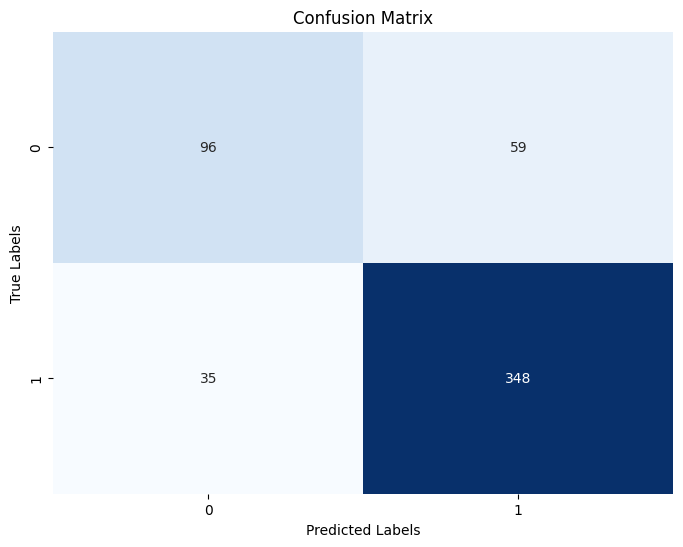

In [54]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Fine-tunning (40 points)

like what you did before, implement Soft Margin SVM but now use rbf kernel. To determine rbf $\gamma$ parameter use validation datas and find best(best by balanced accuracy) $\gamma$ between 0.001 , 0.01, 1, 10, 100. Not that you can't use ```scikit-learn``` library here.

In [57]:
def rbf(x1, x2, gamma=1):
    """
    input:
        x1: first vector
        x2: second vector
        gamma: rbf kernel parameter with defalt value 1.
    output:
        ouput: computed rbf of two input vectors
    """
    diff = x1 - x2
    output = np.exp(-gamma * np.dot(diff, diff))
    return output

def rbf2(x1, x2, gamma=1):
    """
    input:
        x1: first vector
        x2: second vector
        gamma: rbf kernel parameter with defalt value 1.
    output:
        ouput: computed rbf of two input vectors
    """
    diff = x1 - x2
    output = np.exp(-gamma * np.dot(diff, diff))
    return output


def soft_margin_svm(X, y, C, gamma=1):
    """
    input:
        X: training data
        y: training labels
        C: errors weight
        gamma: rbf kernel parameter with defalt value 1.
    output:
        support_vectros: data points which are SVs of our model.
        support_vector_labels: labels of SVs
        support_vector_alphas: alpha coefficient of corresponding SVs 
    """
    n_samples, n_features = X.shape

    K = np.zeros((n_samples, n_samples))
    for i in range(n_samples):
        for j in range(n_samples):
            K[i, j] = rbf(X[i], X[j], gamma)

    P = matrix(np.outer(y, y) * K)
    q = matrix(-np.ones(n_samples))
    A = matrix(y, (1, n_samples), 'd')
    b = matrix(0.0)

    G = matrix(np.vstack((-np.eye(n_samples), np.eye(n_samples))))
    h = matrix(np.hstack((np.zeros(n_samples), np.ones(n_samples) * C)))

    sol = solvers.qp(P, q, G, h, A, b)
    alphas = np.array(sol['x'])

    sv_indices = np.where(alphas > 1e-5)[0]
    alphas = alphas[sv_indices]
    support_vectors = X[sv_indices]
    support_vector_labels = y[sv_indices]

    return support_vectors, support_vector_labels, alphas

def predict(support_vectors, support_vector_labels, support_vector_alphas, X, gamma=1):

    y_pred = np.zeros(X.shape[0])
    for i in range(X.shape[0]):
        for j, alpha in enumerate(support_vector_alphas):
            y_pred[i] += alpha * support_vector_labels[j] * rbf(support_vectors[j], X[i], gamma)
    y_pred = np.sign(y_pred)
    return y_pred


In [59]:
gammas = [0.01, 0.1, 1, 10, 100]
best_gamma = None
best_support_vectors = None
best_support_vector_labels = None
best_support_vector_alphas = None
best_balanced_accuracy = 0
# TODO: Write your code here

for gamma in gammas:
    support_vectors, support_vector_labels, support_vector_alphas = soft_margin_svm(X_train_binary, y_train_binary, C=1, gamma=gamma)

    y_pred_val = predict(support_vectors, support_vector_labels, support_vector_alphas, X_val_binary, gamma)
    balanced_acc = balanced_accuracy_score(y_val_binary, y_pred_val)

    if balanced_acc > best_balanced_accuracy:
        best_gamma = gamma
        best_support_vectors = support_vectors
        best_support_vector_labels = support_vector_labels
        best_support_vector_alphas = support_vector_alphas
        best_balanced_accuracy = balanced_acc

print("Best Gamma:", best_gamma)

     pcost       dcost       gap    pres   dres
 0: -5.7870e+02 -3.1897e+03  2e+04  3e+00  1e-14
 1: -4.0863e+02 -2.0634e+03  2e+03  2e-01  1e-14
 2: -4.2109e+02 -6.8997e+02  3e+02  2e-02  8e-15
 3: -4.6476e+02 -5.9584e+02  1e+02  8e-03  8e-15
 4: -4.8769e+02 -5.5091e+02  7e+01  3e-03  9e-15
 5: -4.9596e+02 -5.3660e+02  4e+01  2e-03  9e-15
 6: -5.0371e+02 -5.2370e+02  2e+01  8e-04  1e-14
 7: -5.0860e+02 -5.1604e+02  8e+00  2e-04  1e-14
 8: -5.1083e+02 -5.1270e+02  2e+00  4e-05  1e-14
 9: -5.1160e+02 -5.1168e+02  8e-02  4e-07  1e-14
10: -5.1164e+02 -5.1164e+02  6e-03  1e-08  1e-14
11: -5.1164e+02 -5.1164e+02  3e-04  6e-10  1e-14
Optimal solution found.


/var/folders/px/x_b_92z578x2bzvgv8br00hm0000gn/T/ipykernel_1824/2181154357.py:70: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_pred[i] += alpha * support_vector_labels[j] * rbf(support_vectors[j], X[i], gamma)


     pcost       dcost       gap    pres   dres
 0: -3.5478e+02 -2.9645e+03  1e+04  3e+00  5e-15
 1: -2.5774e+02 -1.8143e+03  2e+03  1e-01  3e-15
 2: -2.7515e+02 -5.5668e+02  3e+02  2e-02  3e-15
 3: -3.1035e+02 -4.0746e+02  1e+02  5e-03  3e-15
 4: -3.2161e+02 -3.7676e+02  6e+01  2e-03  3e-15
 5: -3.3186e+02 -3.4879e+02  2e+01  3e-04  4e-15
 6: -3.3455e+02 -3.4305e+02  9e+00  1e-04  4e-15
 7: -3.3586e+02 -3.4016e+02  4e+00  1e-14  4e-15
 8: -3.3717e+02 -3.3810e+02  9e-01  6e-15  4e-15
 9: -3.3735e+02 -3.3781e+02  5e-01  2e-15  4e-15
10: -3.3755e+02 -3.3756e+02  2e-02  4e-15  4e-15
11: -3.3755e+02 -3.3755e+02  5e-04  2e-14  4e-15
12: -3.3755e+02 -3.3755e+02  8e-06  3e-14  4e-15
Optimal solution found.


/var/folders/px/x_b_92z578x2bzvgv8br00hm0000gn/T/ipykernel_1824/2181154357.py:70: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_pred[i] += alpha * support_vector_labels[j] * rbf(support_vectors[j], X[i], gamma)


     pcost       dcost       gap    pres   dres
 0: -2.4269e+02 -2.1635e+03  7e+03  2e+00  1e-15
 1: -2.2042e+02 -1.1878e+03  1e+03  1e-01  5e-16
 2: -2.4012e+02 -3.8481e+02  2e+02  1e-02  6e-16
 3: -2.5620e+02 -2.8744e+02  3e+01  2e-03  4e-16
 4: -2.6083e+02 -2.6656e+02  6e+00  2e-04  3e-16
 5: -2.6182e+02 -2.6335e+02  2e+00  4e-05  3e-16
 6: -2.6212e+02 -2.6241e+02  3e-01  4e-06  3e-16
 7: -2.6218e+02 -2.6221e+02  3e-02  3e-07  3e-16
 8: -2.6219e+02 -2.6219e+02  1e-03  9e-09  3e-16
 9: -2.6219e+02 -2.6219e+02  3e-05  2e-10  3e-16
Optimal solution found.


/var/folders/px/x_b_92z578x2bzvgv8br00hm0000gn/T/ipykernel_1824/2181154357.py:70: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_pred[i] += alpha * support_vector_labels[j] * rbf(support_vectors[j], X[i], gamma)


     pcost       dcost       gap    pres   dres
 0: -4.6315e+02 -2.1251e+03  2e+03  1e-13  6e-16
 1: -4.6963e+02 -5.0646e+02  4e+01  4e-14  4e-16
 2: -4.7538e+02 -4.7581e+02  4e-01  8e-15  1e-16
 3: -4.7545e+02 -4.7546e+02  4e-03  6e-15  1e-16
 4: -4.7546e+02 -4.7546e+02  4e-05  2e-15  1e-16
Optimal solution found.


/var/folders/px/x_b_92z578x2bzvgv8br00hm0000gn/T/ipykernel_1824/2181154357.py:70: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_pred[i] += alpha * support_vector_labels[j] * rbf(support_vectors[j], X[i], gamma)


     pcost       dcost       gap    pres   dres
 0: -4.6331e+02 -2.1253e+03  2e+03  9e-13  3e-16
 1: -4.6978e+02 -5.0577e+02  4e+01  6e-14  4e-16
 2: -4.7552e+02 -4.7591e+02  4e-01  1e-14  8e-17
 3: -4.7559e+02 -4.7559e+02  4e-03  7e-15  5e-17
 4: -4.7559e+02 -4.7559e+02  4e-05  4e-14  2e-17
Optimal solution found.


/var/folders/px/x_b_92z578x2bzvgv8br00hm0000gn/T/ipykernel_1824/2181154357.py:70: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_pred[i] += alpha * support_vector_labels[j] * rbf(support_vectors[j], X[i], gamma)


Best Gamma: 0.1


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:2458: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


In [60]:
y_pred = predict_labels(np.array(X_test_binary), best_support_vectors, best_support_vector_labels, best_support_vector_alphas)
_, _, confusion_mat = evaluate(y_test_binary, y_pred)

/var/folders/px/x_b_92z578x2bzvgv8br00hm0000gn/T/ipykernel_1824/1343508123.py:16: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  decision_function[i] += alpha * sv_label * np.dot(sv, x_test[i])


Accuracy:  0.775092936802974
Balanced Accuracy:  0.6442432409668997
Confusion Matrix:
 [[ 52 103]
 [ 18 365]]


# Multiclass SVM (30 points + 50 points optional)

Now we want implement Multiclass SVM. Use ```SVC``` function with rbf kernel from ```scikit-learn``` package on all train datas (all six classes) and choose best hyperparameters for $C$ and $\gamma$ between 0.01, 0.1, 1, 10, 100. After that evaluate it with your function.

Note that in this example we had enough data to split them in train and validation but in case that we don't have enough data, ```scikit-learn``` has a built-in fast library named ```GridSearchCV()``` which can help us in hyperparameter tunning with cross validation.

In [62]:
Cs = [0.01, 0.1, 1, 10, 100]
gammas = [0.01, 0.1, 1, 10, 100]

param_grid={'C' : Cs, 'gamma': gammas}

svc= SVC(kernel='rbf')

grid_search= GridSearchCV(svc,param_grid,cv=5, scoring='balanced_accuracy')
grid_search.fit(X_train_scaled,y_train)

print("Best hyperparameters: ", grid_search.best_params_)

y_pred_val = grid_search.predict(X_val_scaled)
balanced_acc = balanced_accuracy_score(y_val, y_pred_val)
print("Balanced accuracy on validation set: ", balanced_acc)

Best hyperparameters:  {'C': 10, 'gamma': 0.1}
Balanced accuracy on validation set:  0.8985326020599959


Implement Multiclass SVM from scratch without using ready functions (optional).

In [63]:
# TODO: Write your code here
class SVM:
    def __init__(self, learning_rate=0.01, lambda_param=0.01, n_iters=1000):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None

    def fit(self, X, y):
        X = np.array(X)
        y = np.array(y)
        n_samples, n_features = X.shape
        self.w = np.zeros(n_features)
        self.b = 0

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                condition = y[idx] * (np.dot(x_i, self.w) - self.b) >= 1
                if condition:
                    self.w -= self.lr * (2 * self.lambda_param * self.w)
                else:
                    self.w -= self.lr * (2 * self.lambda_param * self.w - np.dot(x_i, y[idx]))
                    self.b -= self.lr * y[idx]

    def predict(self, X):
        X = np.array(X)
        return np.sign(np.dot(X, self.w) - self.b)

def one_vs_rest(X, y, n_classes):
    clfs = []
    for i in range(n_classes):
        clf = SVM()
        y_i = (y == i).astype(int) * 2 - 1
        clf.fit(X, y_i)
        clfs.append(clf)

    def predict(X):
        scores = np.array([clf.predict(X) for clf in clfs]).T
        return np.argmax(scores, axis=1)

    return predict



In [64]:
predict_fn = one_vs_rest(X_train_scaled, y_train, 6)

y_pred = predict_fn(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Accuracy: 0.5282784338098198
Classification Report:
               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         0
         1.0       0.99      0.96      0.98       355
         2.0       0.98      0.89      0.93       189
         3.0       0.87      0.90      0.88       342
         4.0       0.00      0.00      0.00       155
         5.0       1.00      0.18      0.30       185
         6.0       0.00      0.00      0.00       383

    accuracy                           0.53      1609
   macro avg       0.55      0.42      0.44      1609
weighted avg       0.63      0.53      0.55      1609

Confusion Matrix:
 [[  0   0   0   0   0   0   0]
 [ 10 341   0   4   0   0   0]
 [ 20   1 168   0   0   0   0]
 [ 34   0   0 308   0   0   0]
 [120   0   0  35   0   0   0]
 [146   2   4   0   0  33   0]
 [375   0   0   8   0   0   0]]


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_pr

# Different SVM Kernels (40 points)

A kernel in SVM is like a tool that helps solve tricky problems. It lets us work in a space with many dimensions, making complex calculations easier. With kernels, we can deal with lots of dimensions, even an endless amount. Kernels are crucial for sorting data into groups and help spot patterns in the data we're looking at. They're especially good at tackling twisty problems with a straightforward approach.

Sometimes, finding a straight line or flat surface to divide data isn't possible, especially as we explore more dimensions. That's where different types of SVM kernels come in handy. They transform twisty, complicated data into a simpler form that's easier to separate. In this explanation, we talk about 4 popular types of these kernels. Also in following cells you can use any package.

<img src="./kernel.jpg" alt="Types of Kernel Functions"  align=center class="saturate">

### Linear Kernel

This is the simplest kind of kernel, typically working in one dimension. It works best when dealing with a lot of features. Linear kernels are quicker than other types.

**Formula:**

$$F(x, x_j) = sum(x, x_j)$$

Now Implement svc classifier using a linear kernel. Get the prediction and evaluate it by function which you implemented before. Also plot confusion matrix by `Seaborn`.

Balanced accuracy: 0.8317854290205452


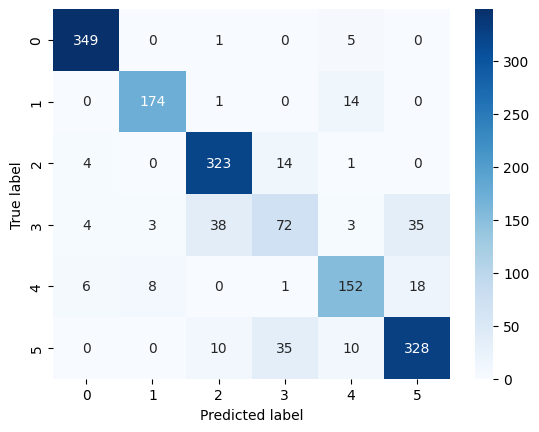

In [65]:
# TODO: Write your code here
Cs = [0.01, 0.1, 1, 10, 100]

best_balanced_acc = 0
best_C = None
for C in Cs:
    clf = SVC(kernel='linear', C=C)
    clf.fit(X_train_scaled, y_train)

    y_pred = clf.predict(X_val_scaled)
    balanced_acc = balanced_accuracy_score(y_val, y_pred)

    if balanced_acc > best_balanced_acc:
        best_balanced_acc = balanced_acc
        best_C = C

clf = SVC(kernel='linear', C=best_C)
clf.fit(X_train_scaled, y_train)

y_pred = clf.predict(X_test_scaled)
balanced_acc = balanced_accuracy_score(y_test, y_pred)
print('Balanced accuracy:', balanced_acc)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()


### Gaussian RBF kernel

This kernel is a favorite choice in SVM, especially for data that doesn't line up straight. It's great for sorting data when you don't know much about it beforehand.

**Formula:**

$$F(x, x_j) = \exp{(-\gamma ||x - xj||^2)}$$

Now, configure the SVC classifier with a sigmoid kernel. Get the prediction and evaluate it by function which you implemented before. Also plot confusion matrix as previous part. 

Balanced accuracy: 0.8652442252472811


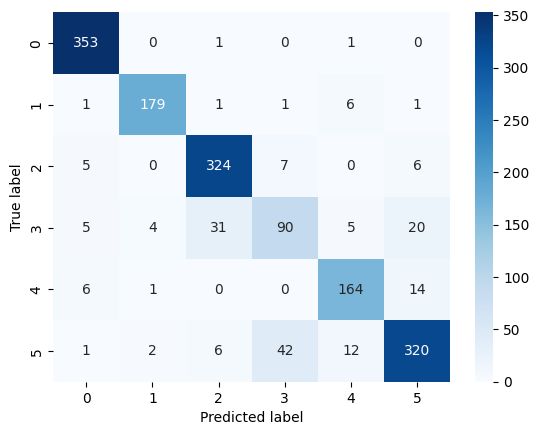

In [66]:
# TODO: Write your code here
Cs = [0.01, 0.1, 1, 10, 100]
degrees = [2, 3, 4]

best_balanced_acc = 0
best_C = None
best_degree = None
for C in Cs:
    for degree in degrees:
        clf = SVC(kernel='poly', C=C, degree=degree)
        clf.fit(X_train_scaled, y_train)

        y_pred = clf.predict(X_val_scaled)
        balanced_acc = balanced_accuracy_score(y_val, y_pred)

        if balanced_acc > best_balanced_acc:
            best_balanced_acc = balanced_acc
            best_C = C
            best_degree = degree

clf = SVC(kernel='poly', C=best_C, degree=best_degree)
clf.fit(X_train_scaled, y_train)

y_pred = clf.predict(X_test_scaled)
balanced_acc = balanced_accuracy_score(y_test, y_pred)
print('Balanced accuracy:', balanced_acc)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

### Polynomial Kernel

This is a broader version of the linear kernel. It's not as popular because it's not as quick or precise.

**Formula:**

$$F(x, x_j) = (x.x_j+1)^d$$

Now, set up the SVC classifier using a *polynomial* kernel. Get the prediction and evaluate it by function which you implemented before. Also plot confusion matrix as previous parts.

Balanced accuracy: 0.8652442252472811


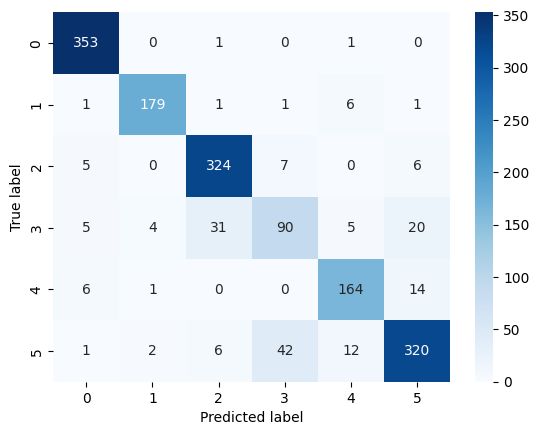

In [67]:
# TODO: Write your code here
Cs = [0.01, 0.1, 1, 10, 100]
degrees = [2, 3, 4]

best_balanced_acc = 0
best_C = None
best_degree = None
for C in Cs:
    for degree in degrees:
        clf = SVC(kernel='poly', C=C, degree=degree)
        clf.fit(X_train_scaled, y_train)

        y_pred = clf.predict(X_val_scaled)
        balanced_acc = balanced_accuracy_score(y_val, y_pred)

        if balanced_acc > best_balanced_acc:
            best_balanced_acc = balanced_acc
            best_C = C
            best_degree = degree

clf = SVC(kernel='poly', C=best_C, degree=best_degree)
clf.fit(X_train_scaled, y_train)

y_pred = clf.predict(X_test_scaled)
balanced_acc = balanced_accuracy_score(y_test, y_pred)
print('Balanced accuracy:', balanced_acc)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()


### Sigmoid Kernel

This is mainly chosen for use with neural networks. The kernel function acts like the activation function in a two-layer perceptron neural network model, helping to activate the neurons.

**Formula:**

$$F(x, x_j) = \tanh(α x a y + c)$$

Now, configure the SVC classifier with a sigmoid kernel. Get the prediction and evaluate it by function which you implemented before. Also plot confusion matrix as previous parts. 

Balanced accuracy: 0.7785962476221417


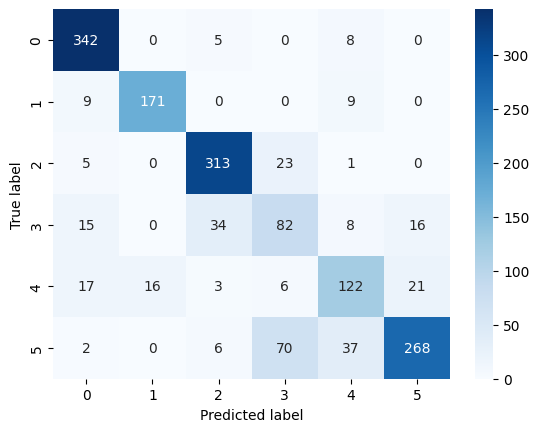

In [68]:
Cs = [0.01, 0.1, 1, 10, 100]
gammas = [0.01, 0.1, 1, 10, 100]
coefs = [0.1, 0.5, 1]

best_balanced_acc = 0
best_C = None
best_gamma = None
best_coef = None
for C in Cs:
    for gamma in gammas:
        for coef in coefs:
            clf = SVC(kernel='sigmoid', C=C, gamma=gamma, coef0=coef)
            clf.fit(X_train_scaled, y_train)

            y_pred = clf.predict(X_val_scaled)
            balanced_acc = balanced_accuracy_score(y_val, y_pred)

            if balanced_acc > best_balanced_acc:
                best_balanced_acc = balanced_acc
                best_C = C
                best_gamma = gamma
                best_coef = coef

clf = SVC(kernel='sigmoid', C=best_C, gamma=best_gamma, coef0=best_coef)
clf.fit(X_train_scaled, y_train)

y_pred = clf.predict(X_test_scaled)
balanced_acc = balanced_accuracy_score(y_test, y_pred)
print('Balanced accuracy:', balanced_acc)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()


Compare these four kernel functions with each other. What are the main advantages and disadvantages of each one? 

`TODO: Write Here`

Linear Kernel:

مزایا:

سرعت بالا در آموزش و پیش‌بینی مدل.

قابلیت استفاده در مجموعه داده‌های با ابعاد بالا.

معایب:

مناسب برای داده‌هایی که قابل جدا کردن با یک خط هستند.

عملکرد ضعیف‌تر در مواردی که داده‌ها دارای تفکیک غیرخطی هستند.

Gaussian RBF Kernel

مزایا:

قابلیت مدل‌سازی داده‌های غیرخطی و پیچیده.

انعطاف‌پذیری بالا در تنظیم پارامترها.

معایب:

نیاز به تنظیم پارامترهای هسته مانند پارامتر γ.

حساسیت به اندازه‌گیری‌های نرمال‌سازی و پیش‌پردازش داده‌ها.


Polynomial Kernel:

مزایا:

توانایی مدل‌سازی داده‌هایی با تفکیک غیرخطی.

انعطاف‌پذیری در تنظیم پارامترهای هسته.

معایب:

زمان بیشتری برای آموزش و پیش‌بینی مدل نسبت به هسته‌های خطی.

ممکن است در برخی موارد از دقت پایین‌تری برخوردار باشد.

Sigmoid Kernel :

مزایا:

قابلیت استفاده در مسائلی که از شباهت با شبکه‌های عصبی با تابع فعال‌سازی 
سیگموئیدی نیاز دارند.

انعطاف‌پذیری در تنظیم پارامترهای هسته.

معایب:

عملکرد نسبتاً ضعیف‌تر نسبت به هسته‌های دیگر مانند گوسی RBF.

نیاز به تنظیم پارامترهای هسته مانند پارامتر α و c.